# Table Of Contents
**1.Introduction**

**2.About Dataset**

**3.Objectives**
 
**4.EDA**
   
   - **4.1 Exploration**
       - **4.1.1 Import  of Libraries**
       - **4.1.2 Reading the dataset**
       - **4.1.3 Attributes Summary**
       - **4.1.4 Exploring Categorical Features**
           - **4.1.4.1 Univariate Analysis**
           - **4.1.4.2 Bivariate Analysis**
       - **4.1.5 Exploring Categorical Vs Numerical Features**
       - **4.1.6 Exploring Numerical Features**
       - **4.1.7 Data Cleaning**
       - **4.1.8 Handling Categorical Attributes**
           - **4.1.8.1 One Hot Encoding**
       - **4.1.9 Handling Numerical Values**
           - **4.1.9.1 Binning**
       - **4.1.10 Handling Outliers**
           - **4.1.10.1 IQR Method**
               - **Oulier detection for 'column'**
               - **Treating Outlier with Capping Method**

**1.Introduction**

The bank provides financial services/products such as savings accounts, current accounts, debit cards, etc. to its customers. In order to increase its overall revenue, the bank conducts various marketing campaigns for its financial products such as credit cards, term deposits, loans, etc. These campaigns are intended for the bank’s existing customers. However, the marketing campaigns need to be cost-efficient so that the bank not only increases their overall revenues but also the total profit. 

The bank conducted a telemarketing campaign for one of its financial products ‘Term Deposits’ to help foster long-term relationships with existing customers. The dataset contains information about all the customers who were contacted during a particular year to open term deposit accounts.

*What is term Deposit?*

Term deposits also called fixed deposits, are the cash investments made for a specific time period ranging from 1 month to 5 years for predetermined fixed interest rates. The fixed interest rates offered for term deposits are higher than the regular interest rates for savings accounts. The customers receive the total amount (investment plus the interest) at the end of the maturity period. Also, the money can only be withdrawn at the end of the maturity period. Withdrawing money before that will result in an added penalty associated, and the customer will not receive any interest returns.

My target is to perform EDA on this bank telemarketing campaign data set to infer knowledge that where bank has to put more effort to improve it's positive response rate.

**2.About Dataset**

* The dataset consist of 16 independent variables and 1 Outcome variable.
* The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

*Input variables:*

1. age 

2. job : type of job admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")

3. marital : marital status ("divorced","married","single","unknown"; note: "divorced" means divorced or widowed)

4. education ("basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")

5. default: Does the customer have credit in default? ( "no","yes","unknown")

6. Balance: balance of the customer

7. housing: Does the customer have a housing loan? ("no","yes","unknown")

8. loan: Does the customer have a personal loan? "no","yes","unknown")

*Related with the last contact of the current campaign:*

9. Contact: contact communication type ("cellular","telephone") 

10. Month: last contact month of year ("jan", "feb", "mar", ..., "nov", "dec")

11. day_of_week: last contact day of the week ("mon","tue","wed","thu","fri")

12. Duration: last contact duration, in seconds. Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call ‘y’ is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

*Other attributes:*

13. Campaign: Number of contacts performed during this campaign and for this client includes last contact

14. pdays: Number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted)

15. Previous: number of contacts performed before this campaign and for this client

16. poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

*Outcome variable:*

17. y - has the client subscribed to a term deposit? ("yes","no")



**3.Objectives**

* factors that may improve the bank’s marketing strategies to attract more customers to get a term deposit. 
* perform required EDA steps with python
* questions asked to perform SQL

**4.EDA**
    
   - **4.1 Exploration**
    

**4.1.1 Import of Libraries**

In [2]:
#numpy and pandas for data manipulation
import numpy as np # numpy for array
import pandas as pd # pandas for dataframe
#matplotlib and seaborn for plotting & Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

**4.1.2 Reading the dataset**

In [3]:
df_bank=pd.read_csv("bank.csv",sep=';') # separator as ';' to read csv file
df_bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [4]:
df_bank_full = pd.read_csv("bank-full.csv",sep=';') #separator as ';' to read csv file
df_bank_full

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [5]:
df_final=df_bank.append(df_bank_full) # combining two dataframes using append method
df_final

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


**4.1.3 Attributes Summary**

In [6]:
df_final.describe() #Understand the statistics of given data.

,age,balance,day,duration,campaign,pdays,previous
count,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000
mean,40.957472,1367.761562,15.816315,258.690179,2.766549,40.158630,0.576892
std,10.615008,3041.608766,8.315680,257.743149,3.099075,100.127123,2.254838
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,21.000000,320.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


**Explanation**

* age: __minimum age__ of the bank’s client’s is __18__ while the __maximum age is 95__. The __average age__ of the customers is __41__.
* balance:  the __mean customer balance is 1362__, while the __minimum balance is -8019__. The __maximum balance stands at 102127__.
* duration: the __maximum duration__ in seconds of a single contact is __4918 seconds__, while the __shortest duration__ of a contact with a   client lasted for __1 seconds__.
* campaign: the __maximum number of contacts__ made in the campaign to a single client is __63__ while the __minimum number of contacts is   1__. The __average number of contacts made was 2.7__ .
* pdays: a __maximum of 871days__ passed by after a client was last contacted, while a __minimum of -1 days__ passed by after a client     was last contacted.
* previous: a __maximum of 275 contacts__ were made previously to a single client before the current campaign, while a __minimum of 0   contacts__ were made previously .

|Attribute Name||Attribute Type||Reason|
|--------------||--------------||------|
|age||Numerical(__Discrete__)||Age cannot be is decimal. So __Discrete__|
|job||Categorical(__Nominal__)||Job has got no Hierarchy.So __Nominal__| 
|marital||Categorical(__Nominal__)||Marital Status has got no hierarchy. So __Nominal__|
|education||Categorical(__Ordinal__)||Education possible values are ordered.So __Ordinal__|
|default||Categorical(__Nominal__)||Default has got no Hierarchy.So __Nominal__| 
|balance||Numerical(__Discrete__)||Balance of the customer which is __Discrete__|
|housing||Categorical(__Nominal__)||Housing has got no Hierarchy.So __Nominal__| 
|loan||Categorical(__Nominal__)||Loan has got no Hierarchy.So __Nominal__|
|contact||Categorical(__Nominal__)||Contact has got no Hierarchy.So __Nominal__|
|day||Categorical(__Nominal__)||Day is __Nominal__ because it just categorizes the variable| 
|month||Categorical(__Nominal__)||Months are divided into distinct categories. So __Nominal__| 
|duration||Numerical(__Discrete__)||Duration in seconds.So __Discrete__|
|campaign||Numerical(__DIscrete__)||Campaign in number.So __Discrete__|
|pdays||Numerical(__Discrete__)||Pdays is number of days. So __Discrete__|
|previous||Numerical(__Discrete__)||Previous is number of days. So __Discrete__|
|poutcome||Categorical(__Ordinal__)||Poutcome id ordered. So __Ordinal__|
|y||Categorical(__Nominal__)||y has got no Hierarchy.So __Nominal__|

In [184]:
df_final.duplicated().sum() # Count duplicate in a DataFrame

4521

**Explanation**
* Since we have __4521__ duplicate rows after merging 2 datasets.
* Which implies that First dataset datapoints are contained in Second dataset. 
* So we will drop duplicate values using __drop_duplicates()__.


In [7]:
df_final=df_final.drop_duplicates() # to remove the duplicates in the dataframe.
df_final

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [25]:
df_final.shape # shape function is used to find size of the dataset.

(45211, 17)

**Explanation**
* Total Rows = __45211__
* Total Columns =__17__

In [26]:
df_final.head() # head function shows top 5 observations

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [27]:
df_final.tail() # tail function shows bottom 5 observations

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [28]:
df_final.nunique() #returns the number of unique values for each column.

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [29]:
df_final.info() # provides information about the dataframe.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.2+ MB


In [30]:
df_final.isnull().sum() # to Check null values

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

**4.1.4 Exploring Categorical Features**
    
   - **4.1.4.1 Univariate Analysis**

<AxesSubplot:xlabel='y', ylabel='count'>

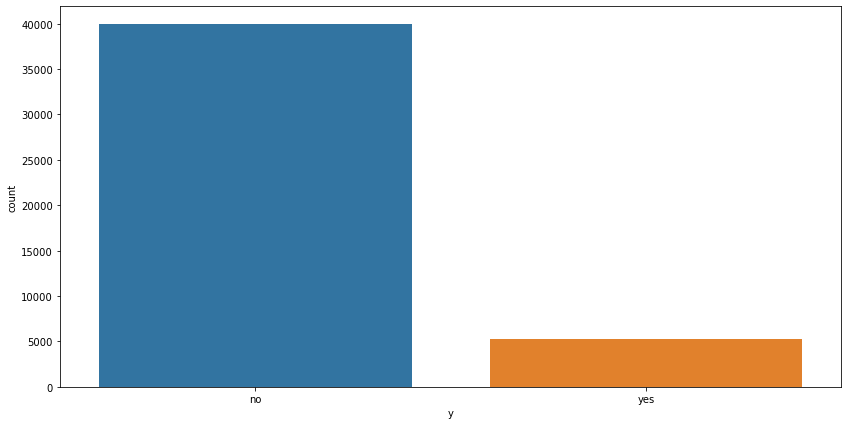

In [31]:
plt.figure(figsize=(14,7))
sns.countplot(data=df_final,x='y')

In [32]:
(df_final['y']=='yes').sum()

5289

In [33]:
print((df_final['y']=='yes').value_counts(normalize=True)*100)

False    88.30152
True     11.69848
Name: y, dtype: float64


**Explanation**
* Out of 45211 records there were __5289 subscriptions to the term deposit which is 12%__. Rest clients did not subscribe.

**4.1.4.2 Bivariate Analysis**

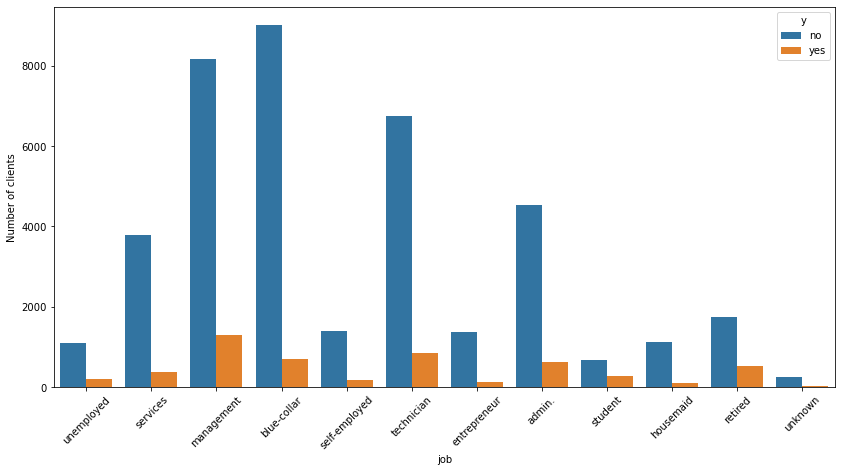

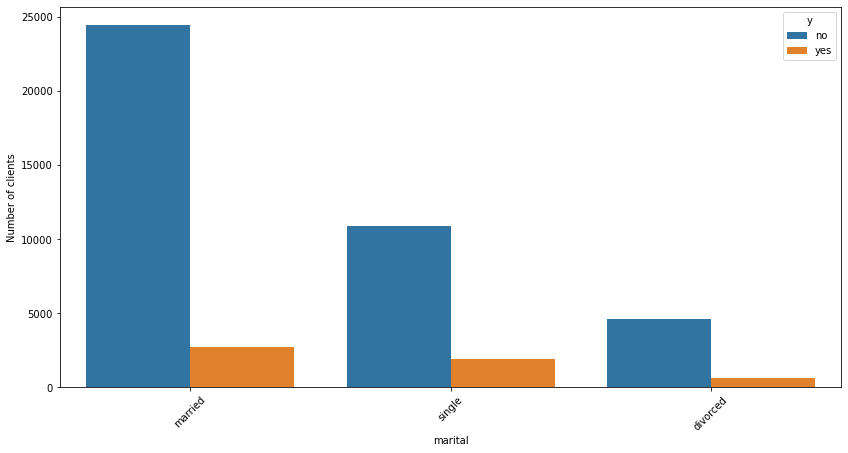

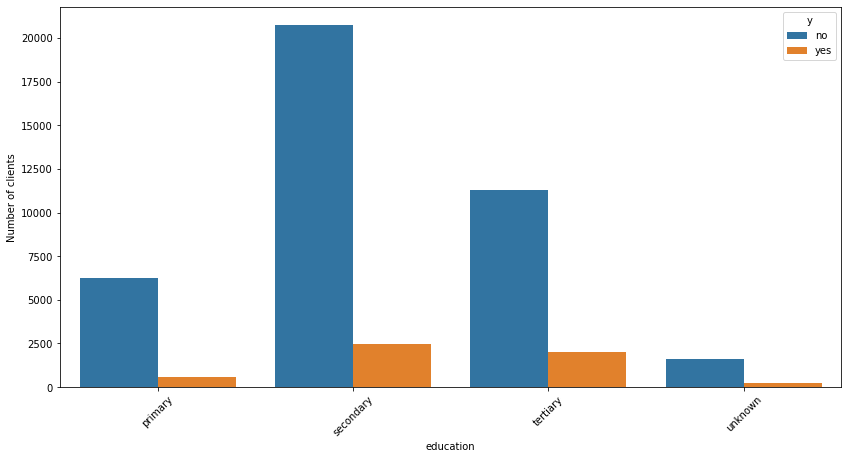

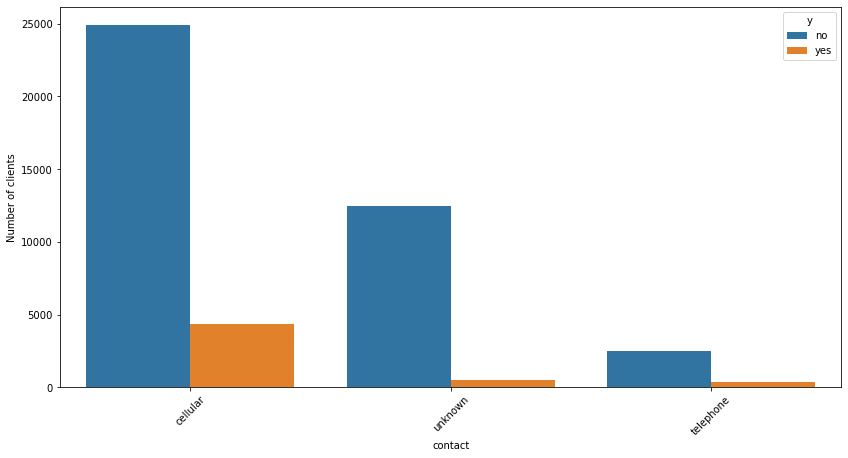

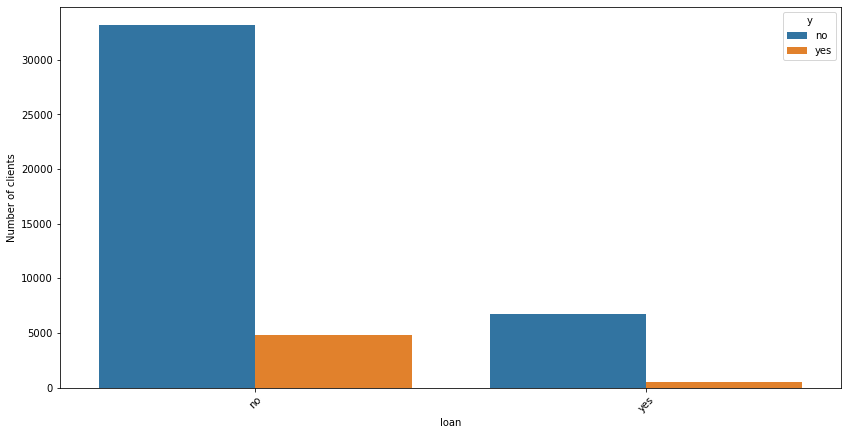

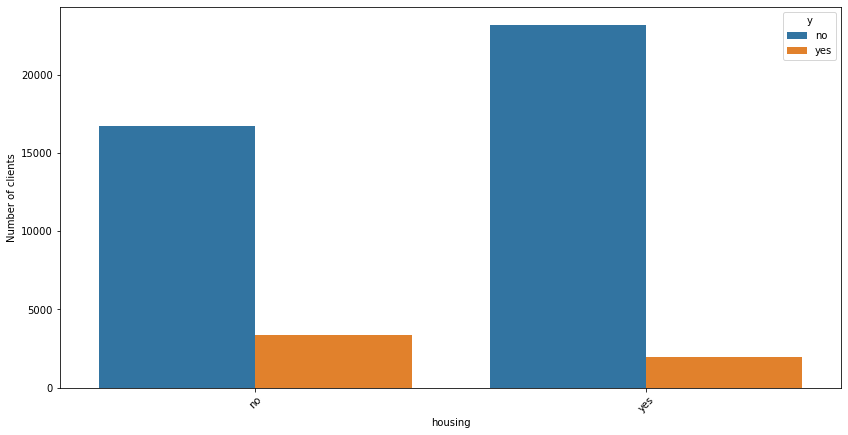

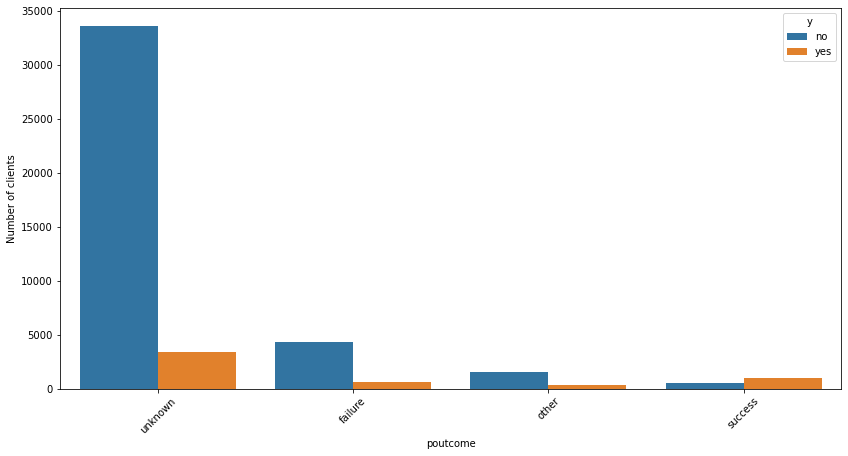

<AxesSubplot:xlabel='poutcome', ylabel='Number of clients'>

In [34]:
def plot_bar(col1,col2):     # creating a function to show categorical disribution
    
    plt.figure(figsize=(14,7))
    plot=sns.countplot(data=df_final,x=col1,hue=col2)
    plt.xticks(rotation=45)
    plt.xlabel(f'{col1}')
    plt.ylabel('Number of clients')
    plt.show()
    return plot_bar
plot_bar('job',df_final['y'])
plot_bar('marital',df_final['y']) 
plot_bar('education',df_final['y'])
plot_bar('contact',df_final['y']) 
plot_bar('loan',df_final['y']) 
plot_bar('housing',df_final['y'])
plot_bar('poutcome',df_final['y'])

**Explanation**

* __Management__ and __Technician__ have opened the deposits most of all. 
* __Married__ consumers have deposite more. Also __single__ consumers have also responded well.
* consumers having __Secondary__ and __tertiary__ background have deposit.
* __cellular__ is most preferred communication channel.
* consumers who are having __no loan__ have deposits rather than who have loan.
* consumers who have don't have __Housing loan__ have subscribed to deposit. 
* __poutcome__ have no impact on marketing campaign of a bank.Because the impact on failure and success is very less. And majority is unknown.


**4.1.5 Exploring Categorical Vs Numerical Features**

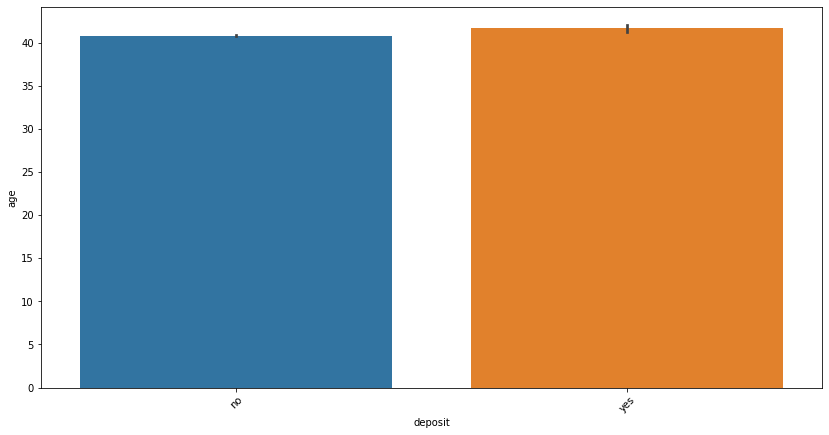

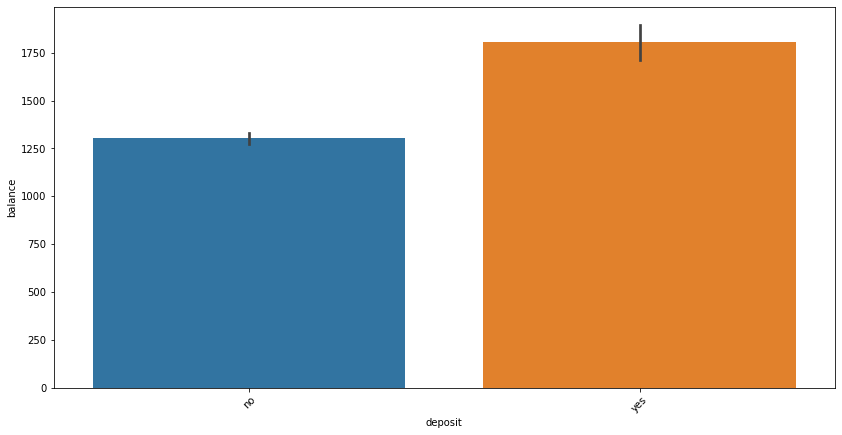

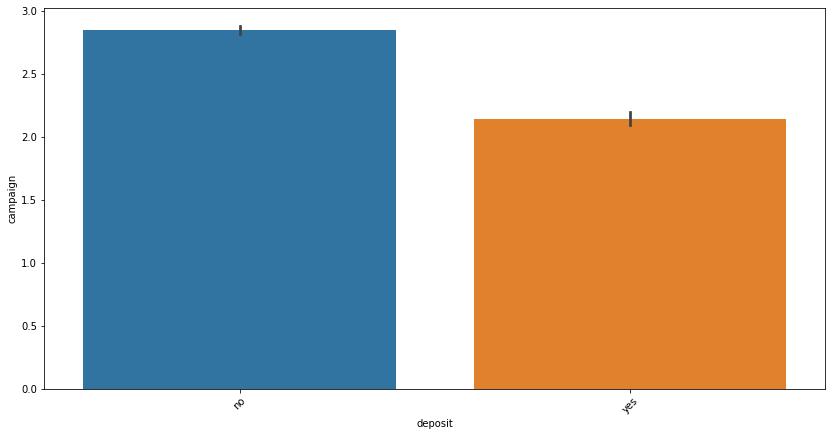

<AxesSubplot:xlabel='deposit', ylabel='campaign'>

In [35]:
def plot_bar(col1,col2):     # creating a function to show categorical disribution
    
    plt.figure(figsize=(14,7))
    plot=sns.barplot(data=df_final,x=col1,y=col2)
    plt.xticks(rotation=45)
    plt.xlabel("deposit")
    plt.ylabel(f'{col2}')
    plt.show()
    return plot_bar



plot_bar(df_final['y'],'age')
plot_bar(df_final['y'],'balance')
plot_bar(df_final['y'],'campaign')

**Explanation**

* There are more client between the __ages of 0 and 40__ who subscribed to the term deposit than those who did not.
* There are more clients with a __balance between 0 and 1750__ who subscribed to the term deposit than those who did not.
* There are more clients who subscribed to the term deposit but had been __contacted more than 2 times__.

**4.1.6 Exploring Numerical Features**

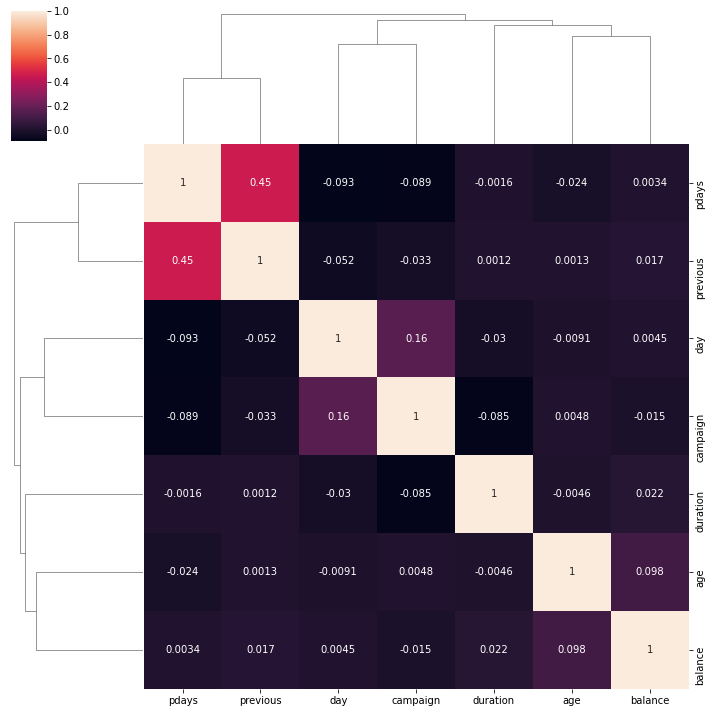

In [36]:
Corr = df_final.corr()
sns.clustermap(Corr, annot=True)

**Explanation**

* Positive correlation between __pdays__ and __previous__.

**4.1.7 Data Cleaning**

* Categorical variables dominate in the dataset .so we need to transform categorical variables.
* For categories of more than 3 types of possible option ,it is proposed to use the encoding. it will allow to correctly relate   the values to the target variable.
* In some cases rescaling is proposed to normalize the data.
* If we observe carefully, there are some columns that obviously __do not affect bank’s marketing strategies to attract more customers to get a term deposit like __‘day’__ ,__'poutcome'__. We will get rid of these redundant columns.
* By using __drop()__.

In [37]:
df_final=df_final.drop(['day','poutcome'],axis=1) #drop() is used to drop certain columns
df_final

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,oct,79,1,-1,0,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,may,220,1,339,4,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,apr,185,1,330,1,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,jun,199,4,-1,0,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,may,226,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,nov,977,3,-1,0,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,nov,456,2,-1,0,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,nov,1127,5,184,3,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,nov,508,4,-1,0,no


**4.1.8.Handling Categorical Attributes**

   - **4.1.8.1 One Hot Encoding**

In [205]:
# creating new df
# setting columns we use
df_ohe = pd.read_csv("bank-full.csv",sep=';',usecols=['job','marital','education','default','housing',
                                                    'loan','contact','month','y' ])
df_ohe

,job,marital,education,default,housing,loan,contact,month,y
0,management,married,tertiary,no,yes,no,unknown,may,no
1,technician,single,secondary,no,yes,no,unknown,may,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,no
4,unknown,single,unknown,no,no,no,unknown,may,no
...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,yes
45207,retired,divorced,primary,no,no,no,cellular,nov,yes
45208,retired,married,secondary,no,no,no,cellular,nov,yes
45209,blue-collar,married,secondary,no,no,no,telephone,nov,no


In [207]:
ohe = pd.get_dummies(df_ohe, prefix={'job':'job',
                                        'marital':'marital',
                                        'education':'education',
                                        'default':'default',
                                        'housing':'housing',
                                        'loan':'loan',
                                        'contact':'contact',
                                        'month':'month',
                                        'y':'y'
                                              },
                            drop_first=False)

In [208]:
df_ohe= pd.concat([df_ohe,ohe],axis=1) 
df_ohe

,job,marital,education,default,housing,loan,contact,month,y,job_admin.,...,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,y_no,y_yes
0,management,married,tertiary,no,yes,no,unknown,may,no,0,...,0,0,0,0,1,0,0,0,1,0
1,technician,single,secondary,no,yes,no,unknown,may,no,0,...,0,0,0,0,1,0,0,0,1,0
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,no,0,...,0,0,0,0,1,0,0,0,1,0
3,blue-collar,married,unknown,no,yes,no,unknown,may,no,0,...,0,0,0,0,1,0,0,0,1,0
4,unknown,single,unknown,no,no,no,unknown,may,no,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,yes,0,...,0,0,0,0,0,1,0,0,0,1
45207,retired,divorced,primary,no,no,no,cellular,nov,yes,0,...,0,0,0,0,0,1,0,0,0,1
45208,retired,married,secondary,no,no,no,cellular,nov,yes,0,...,0,0,0,0,0,1,0,0,0,1
45209,blue-collar,married,secondary,no,no,no,telephone,nov,no,0,...,0,0,0,0,0,1,0,0,1,0


In [42]:
df_final.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [43]:
print((df_final['job']=='unknown').value_counts(normalize=True)*100)

False    99.362987
True      0.637013
Name: job, dtype: float64


In [44]:
df_final.job.mode()

0    blue-collar
dtype: object

Text(0.5, 1.0, 'Job with unknown')

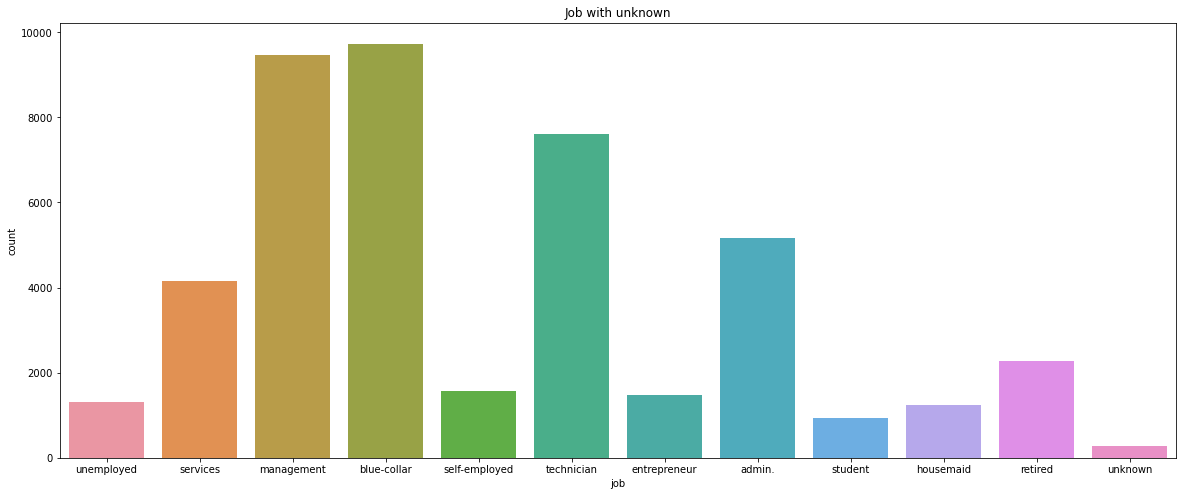

In [45]:
plt.figure(figsize=(20,8))
sns.countplot(data=df_final, x="job")
plt.title("Job with unknown")

In [46]:
x=df_final['job'].replace(['unknown'],[df_final['job'].mode()],inplace = True) # replacing unknown with mode

In [47]:
df_final.job.value_counts()

blue-collar      10020
management        9458
technician        7597
admin.            5171
services          4154
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: job, dtype: int64

Text(0.5, 1.0, 'unknown replaced with mode')

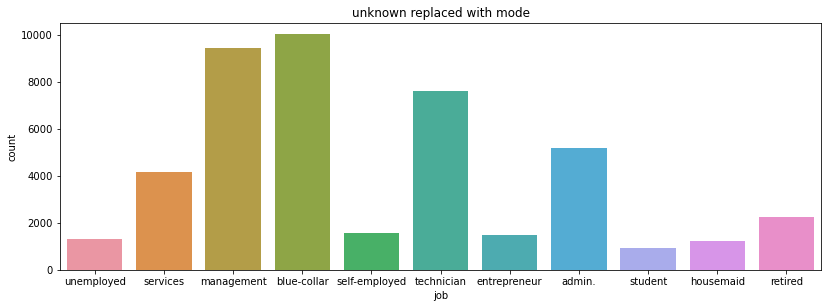

In [48]:
plt.figure(figsize=(30,10))
plt.subplot(2,2,1)
sns.countplot(data=df_final, x=df_final.job) 
plt.title("unknown replaced with mode")

**Explanation**

* Since __job__ has __MCAR__ pattern as missing data which is less than 5%.
* So we can replace 'unknown' with __Mode__.
* It is clearly visible that after replacing with Mode there has been almost no changes in the countplot.

In [49]:
df_final.education.value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [50]:
print((df_final['education']=='unknown').value_counts(normalize=True)*100)

False    95.892593
True      4.107407
Name: education, dtype: float64


In [51]:
df_final.education.mode()

0    secondary
dtype: object

Text(0.5, 1.0, 'education with unknown')

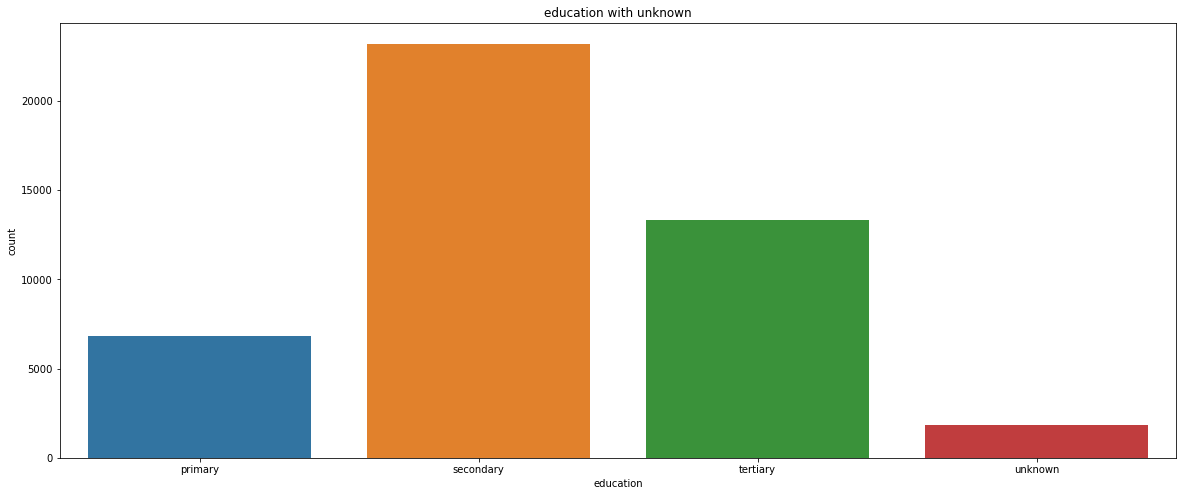

In [52]:
plt.figure(figsize=(20,8))
sns.countplot(data=df_final, x="education")
plt.title("education with unknown")

In [53]:
df_final['education'].replace(['unknown'],[df_final['education'].mode()],inplace = True) # replacing unknown with mode

Text(0.5, 1.0, 'unknown replaced with mode')

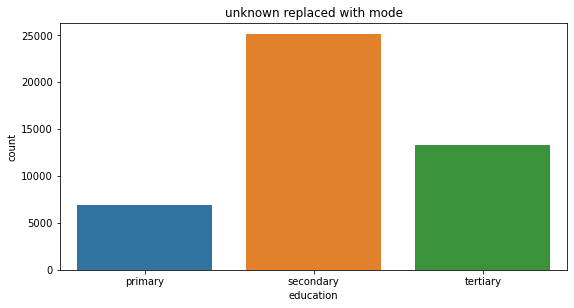

In [54]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.countplot(data=df_final, x=df_final.education) 
plt.title("unknown replaced with mode")

**Explanation**

* Since __education__ has __MCAR__ pattern as missing data which is less than 5%.
* So we can replace 'unknown' with __Mode__.
* It is clearly visible that after replacing with Mode there has been slight increase in secondary column value.

**4.1.9 Handling Numerical Values**
    
  - **4.1.9.1 Binning**

In [55]:
min_value = df_final['age'].min()
max_value = df_final['age'].max()
print("minimum value of age is: ",min_value )
print( "maximum value of age is: ",max_value )

minimum value of age is:  18
maximum value of age is:  95


In [56]:
bins = np.linspace(min_value,max_value,4) # linspace() to calculate the 4 bins, equally distributed 
bins                                        # since 3 labels so 4 bins

array([18.        , 43.66666667, 69.33333333, 95.        ])

In [57]:
labels = ['Adults','Medium_age','Senior'] # Defining the labels

In [127]:
df_final['categorized_age'] = pd.cut(df_final['age'], bins=bins, labels=labels, include_lowest=True)
df_final

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,y,categorized_age
0,30.0,unemployed,married,primary,no,1787.0,no,no,cellular,oct,79.0,1.0,-1.0,0.0,no,Adults
1,33.0,services,married,secondary,no,4789.0,yes,yes,cellular,may,220.0,1.0,339.0,4.0,no,Adults
2,35.0,management,single,tertiary,no,1350.0,yes,no,cellular,apr,185.0,1.0,330.0,1.0,no,Adults
3,30.0,management,married,tertiary,no,1476.0,yes,yes,unknown,jun,199.0,4.0,-1.0,0.0,no,Adults
4,59.0,blue-collar,married,secondary,no,0.0,yes,no,unknown,may,226.0,1.0,-1.0,0.0,no,Medium_age
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,technician,married,tertiary,no,825.0,no,no,cellular,nov,977.0,3.0,-1.0,0.0,yes,Medium_age
45207,71.0,retired,divorced,primary,no,1729.0,no,no,cellular,nov,456.0,2.0,-1.0,0.0,yes,Senior
45208,72.0,retired,married,secondary,no,5715.0,no,no,cellular,nov,1127.0,5.0,184.0,3.0,yes,Senior
45209,57.0,blue-collar,married,secondary,no,668.0,no,no,telephone,nov,508.0,4.0,-1.0,0.0,no,Medium_age


In [137]:
levels = {"Adults":1,"Medium_age":2,"Senior":3}  # converting the labels into a numeric form so as to 
                                                # convert them into the machine-readable form.
df_final["Ordinal Encoding"] = df_final["categorized_age"].map(levels)
df_final

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,y,categorized_age,Ordinal Encoding
0,30.0,unemployed,married,primary,no,1787.0,no,no,cellular,oct,79.0,1.0,-1.0,0.0,no,Adults,1
1,33.0,services,married,secondary,no,4789.0,yes,yes,cellular,may,220.0,1.0,339.0,4.0,no,Adults,1
2,35.0,management,single,tertiary,no,1350.0,yes,no,cellular,apr,185.0,1.0,330.0,1.0,no,Adults,1
3,30.0,management,married,tertiary,no,1476.0,yes,yes,unknown,jun,199.0,4.0,-1.0,0.0,no,Adults,1
4,59.0,blue-collar,married,secondary,no,0.0,yes,no,unknown,may,226.0,1.0,-1.0,0.0,no,Medium_age,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,technician,married,tertiary,no,825.0,no,no,cellular,nov,977.0,3.0,-1.0,0.0,yes,Medium_age,2
45207,71.0,retired,divorced,primary,no,1729.0,no,no,cellular,nov,456.0,2.0,-1.0,0.0,yes,Senior,3
45208,72.0,retired,married,secondary,no,5715.0,no,no,cellular,nov,1127.0,5.0,184.0,3.0,yes,Senior,3
45209,57.0,blue-collar,married,secondary,no,668.0,no,no,telephone,nov,508.0,4.0,-1.0,0.0,no,Medium_age,2


**Explanation**

* After Binning, I have encoded using __label encoding__ to the  __binned column i.e 'categorized_age'__ .


In [59]:
print((df_final['duration']==0).value_counts(normalize=True)*100)

False    99.993364
True      0.006636
Name: duration, dtype: float64


In [60]:
df_final.drop(df_final.index[df_final['duration'] == 0], inplace = True) # dropping a specific value from a column

In [61]:
print((df_final['duration']==0).value_counts(normalize=True)*100)

False    100.0
Name: duration, dtype: float64


**Explanation**

* Since 0 has value count of 3 in duration column. So we can drop the 0 .

In [62]:
print((df_final['pdays']==-1).value_counts(normalize=True)*100) # percentage of '-1' in pdays column.

True     81.735534
False    18.264466
Name: pdays, dtype: float64


**Explanation**
* -1 __possibly__ means that the __client wasn't contacted before or stands for missing data.__
* Since we are not sure exactly what -1 means I suggest to __drop__ this column, because -1 makes __more than 81%__ of the values of the column.

**4.1.10 Handling Outliers**

   - **4.1.10.1 IQR Method**

**Oulier detection for 'balance'**

<AxesSubplot:xlabel='balance'>

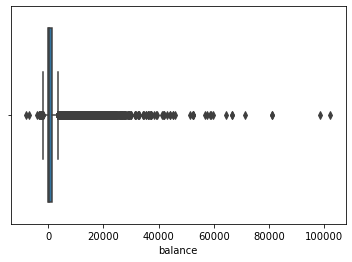

In [63]:
sns.boxplot(data=df_final,x='balance')

In [64]:
percentile25=df_final.balance.quantile(0.25)
percentile75=df_final.balance.quantile(0.75)
print("25 Percentile is : " ,percentile25)
print("75 percentile is : ", percentile75)

25 Percentile is :  72.0
75 percentile is :  1428.0


In [65]:
iqr=percentile75-percentile25
iqr

1356.0

In [66]:
upper_limit= percentile75 + 1.5 * iqr
lower_limit= percentile25 - 1.5 * iqr
print("upper_limit is : ", upper_limit)
print("lower_limit is : ", lower_limit)

upper_limit is :  3462.0
lower_limit is :  -1962.0


**Treating Outlier with Capping Method**


In [67]:
new_df_cap=df_final.copy()
new_df_cap.balance=np.where(new_df_cap.balance>upper_limit,upper_limit,np.where(new_df_cap.balance<lower_limit,lower_limit,
                             new_df_cap.balance))

<AxesSubplot:xlabel='balance'>

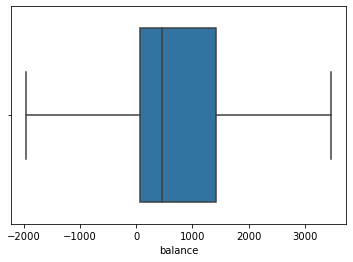

In [68]:
sns.boxplot(data=new_df_cap,x='balance')

**Oulier detection for 'age'**

<AxesSubplot:xlabel='age'>

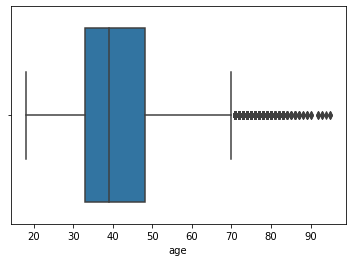

In [69]:
sns.boxplot(data=df_final,x='age')

In [70]:
percentile25=df_final.age.quantile(0.25)
percentile75=df_final.age.quantile(0.75)
print("25 Percentile is : " ,percentile25)
print("75 percentile is : ", percentile75)

25 Percentile is :  33.0
75 percentile is :  48.0


In [71]:
iqr=percentile75-percentile25
iqr

15.0

In [72]:
upper_limit= percentile75 + 1.5 * iqr
lower_limit= percentile25 - 1.5 * iqr
print("upper_limit is : ", upper_limit)
print("lower_limit is : ", lower_limit)

upper_limit is :  70.5
lower_limit is :  10.5


**Treating Outlier with Capping Method**

In [73]:
new_df_cap=df_final.copy()
new_df_cap.age=np.where(new_df_cap.age>upper_limit,upper_limit,np.where(new_df_cap.age<lower_limit,lower_limit,
                             new_df_cap.age))

<AxesSubplot:xlabel='age'>

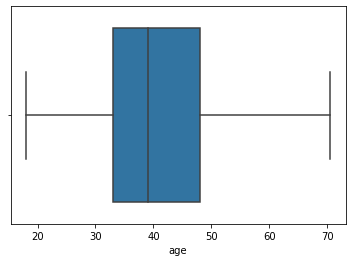

In [74]:
sns.boxplot(data=new_df_cap,x='age')

**Oulier detection for 'duration'**

<AxesSubplot:xlabel='duration'>

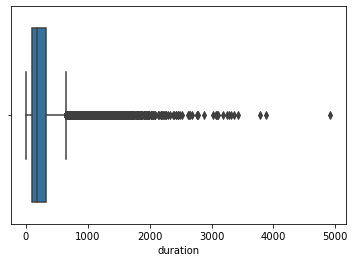

In [75]:
sns.boxplot(data=df_final,x='duration')

In [76]:
percentile25=df_final.duration.quantile(0.25)
percentile75=df_final.duration.quantile(0.75)
print("25 Percentile is : " ,percentile25)
print("75 percentile is : ", percentile75)

25 Percentile is :  103.0
75 percentile is :  319.0


In [77]:
iqr=percentile75-percentile25
iqr

216.0

In [78]:
upper_limit= percentile75 + 1.5 * iqr
lower_limit= percentile25 - 1.5 * iqr
print("upper_limit is : ", upper_limit)
print("lower_limit is : ", lower_limit)

upper_limit is :  643.0
lower_limit is :  -221.0


**Treating Outlier with Capping Method**

In [79]:
new_df_cap=df_final.copy()
new_df_cap.duration=np.where(new_df_cap.duration>upper_limit,upper_limit,np.where(new_df_cap.duration<lower_limit,lower_limit,
                             new_df_cap.duration))

<AxesSubplot:xlabel='duration'>

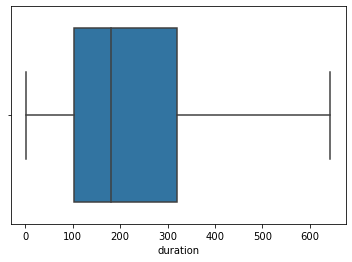

In [80]:
sns.boxplot(data=new_df_cap,x='duration')

**Oulier detection for 'campaign'**

<AxesSubplot:xlabel='campaign'>

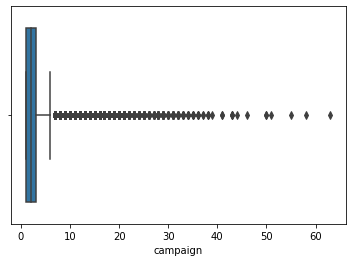

In [81]:
sns.boxplot(data=df_final,x='campaign')

In [82]:
percentile25=df_final.campaign.quantile(0.25)
percentile75=df_final.campaign.quantile(0.75)
print("25 Percentile is : " ,percentile25)
print("75 percentile is : ", percentile75)

25 Percentile is :  1.0
75 percentile is :  3.0


In [83]:
iqr=percentile75-percentile25
iqr

2.0

In [84]:
upper_limit= percentile75 + 1.5 * iqr
lower_limit= percentile25 - 1.5 * iqr
print("upper_limit is : ", upper_limit)
print("lower_limit is : ", lower_limit)

upper_limit is :  6.0
lower_limit is :  -2.0


**Treating Outlier with Capping Method**

In [85]:
new_df_cap = df_final.copy()

new_df_cap.campaign = np.where(new_df_cap.campaign > upper_limit,upper_limit,
                               
                               np.where(new_df_cap.campaign<lower_limit,lower_limit, new_df_cap.campaign))

<AxesSubplot:xlabel='campaign'>

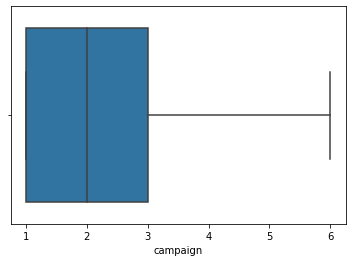

In [86]:
sns.boxplot(data=new_df_cap,x='campaign')

**Oulier detection for 'pdays'**

<AxesSubplot:xlabel='pdays'>

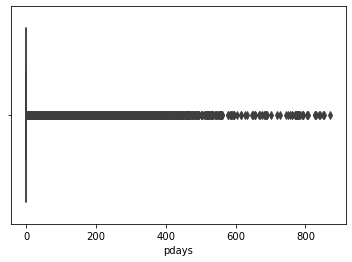

In [87]:
sns.boxplot(data=df_final,x='pdays')

In [88]:
percentile25=df_final.pdays.quantile(0.25)
percentile75=df_final.pdays.quantile(0.75)
print("25 Percentile is : " ,percentile25)
print("75 percentile is : ", percentile75)

25 Percentile is :  -1.0
75 percentile is :  -1.0


In [89]:
iqr=percentile75-percentile25
iqr

0.0

In [90]:
upper_limit= percentile75 + 1.5 * iqr
lower_limit= percentile25 - 1.5 * iqr
print("upper_limit is : ", upper_limit)
print("lower_limit is : ", lower_limit)

upper_limit is :  -1.0
lower_limit is :  -1.0


**Treating Outlier with Capping Method**

In [91]:
new_df_cap = df_final.copy()

new_df_cap.pdays = np.where(new_df_cap.pdays> upper_limit,upper_limit,
                               
                               np.where(new_df_cap.pdays>lower_limit,lower_limit, new_df_cap.pdays))

<AxesSubplot:xlabel='pdays'>

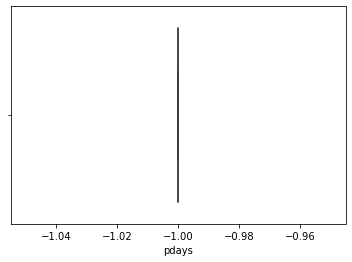

In [92]:
sns.boxplot(data=new_df_cap,x='pdays')

**Oulier detection for 'previous'**

<AxesSubplot:xlabel='previous'>

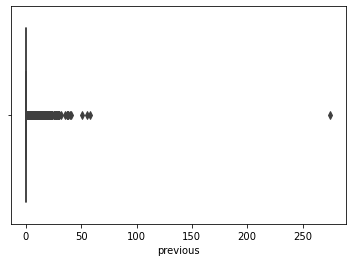

In [93]:
sns.boxplot(data=df_final,x='previous')

In [94]:
percentile25=df_final.previous.quantile(0.25)
percentile75=df_final.previous.quantile(0.75)
print("25 Percentile is : " ,percentile25)
print("75 percentile is : ", percentile75)

25 Percentile is :  0.0
75 percentile is :  0.0


In [95]:
iqr=percentile75-percentile25
iqr

0.0

In [96]:
upper_limit= percentile75 + 1.5 * iqr
lower_limit= percentile25 - 1.5 * iqr
print("upper_limit is : ", upper_limit)
print("lower_limit is : ", lower_limit)

upper_limit is :  0.0
lower_limit is :  0.0


**Treating Outlier with Capping Method**

In [97]:
new_df_cap = df_final.copy()

new_df_cap.previous = np.where(new_df_cap.previous> upper_limit,upper_limit,
                               
                               np.where(new_df_cap.previous<lower_limit,lower_limit, new_df_cap.previous))

<AxesSubplot:xlabel='previous'>

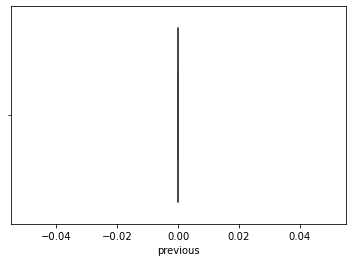

In [98]:
sns.boxplot(data=new_df_cap,x='previous')

In [100]:
df_final.to_csv('bank_data.csv', index=False) # exporting csv to localhost